# Copia: quickstart

In [1]:
import pandas as pd
import copia.plot as plot

Load data:

In [2]:
df = pd.read_csv('datasets/dum.csv', sep=';', header=None)
df.columns = 'work', 'signature'
df.head()

,work,signature
0,Aiol (1),"Leiden, UB, BPL 1049; Brussel, KB, IV 816"
1,Aiol (2),"Breda, Arch. Begijnhof, z.s."
2,Alexanders geesten,"München, Bayerische Staatsbibliotheek, Cod. ge..."
3,Alexanders geesten,"Gent, UB, 2749,6"
4,Alexanders geesten,"Leiden, UB, Ltk. 1196"


Convert to abundance data:

In [3]:
from copia.utils import to_abundance
works = df['work']
abundance = to_abundance(works)
print(abundance)
print(abundance.sum())

[ 1  1  5  2  1  2  1  1  2  2  3  3  1  1  2  1  1  1  1  2  1  1  1  1
  1  1  4  1  1  7  1  1  3  1 10  1  3  2 10  4  2  1  3  6  5  2  5  2
  5  1  1  1  1  1  2 17  2  1  1  2  1  1  1  3  1  1  1  1  1  1  1  1
  1  1  1]
167


100%|██████████| 100/100 [00:15<00:00,  6.34it/s]


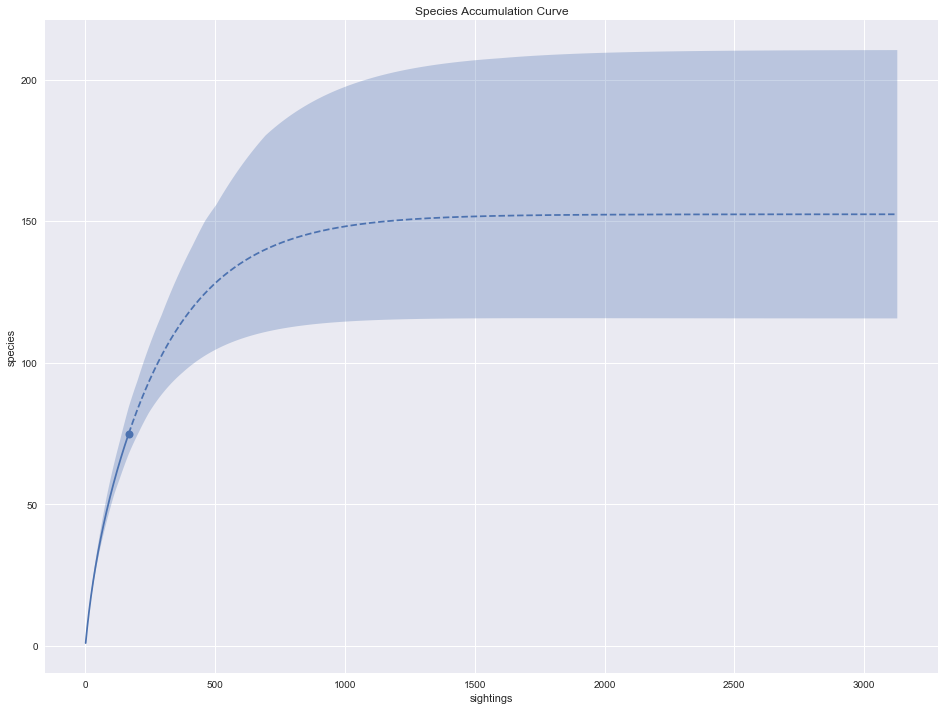

In [4]:
plot.species_accumulation_curve(abundance, incl_minsample=False);

In [5]:
from copia.richness import diversity
print(diversity(abundance, method='minsample'))
print(diversity(abundance, method='minsample', solver='grid'))
print(diversity(abundance, method='minsample', solver='fsolve'))
print(diversity(abundance, method='minsample', solver='grid', tolerance=1e-10))

2214.756047756048
2214.756047756048
2214.754452813089
2214.756047756048


/Users/mikekestemont/GitRepos/copia/copia/richness.py:447: UserWarning: Tolerance criterion not met: 0.005726762492940907 > 1e-10
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")


{'richness': 518.5974575974576, 'x*': 2.221102221102221, 'n': 161}


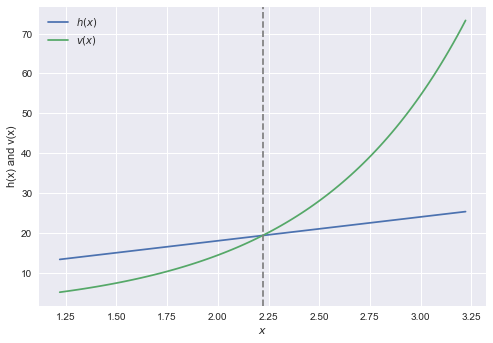

In [6]:
assemblage = ['A', 'B', 'C']
assemblage += ['D'] * 2 + ['E'] * 2
assemblage += ['F'] * 3 + ['G'] * 3 + ['H'] * 3
assemblage += ['I'] * (161 - len(assemblage))

import copia.utils as u
x = u.to_abundance(assemblage)
print(diversity(x, method='minsample', solver='grid', diagnostics=True))

{'richness': 2214.756047756048, 'x*': 12.262012262012263, 'n': 167}


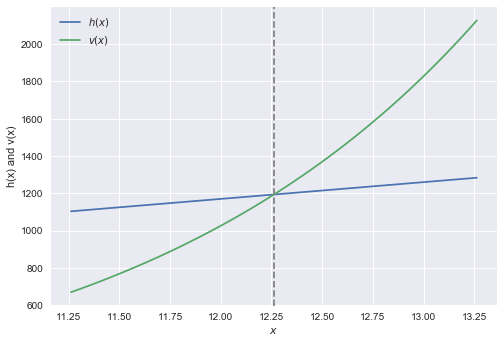

In [7]:
print(diversity(abundance, method='minsample', solver='grid', diagnostics=True))

In [8]:
from copia.hill import hill_numbers
emp, est = hill_numbers(abundance)

100%|██████████| 1000/1000 [00:15<00:00, 65.55it/s]


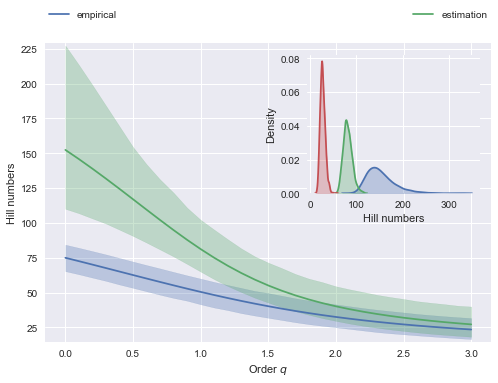

In [9]:
plot.hill_plot(emp, est);

 41%|████      | 409/1000 [00:00<00:00, 992.40it/s]/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


diff_intersect: 1.263820265387687e+19


/Users/mikekestemont/GitRepos/copia/copia/richness.py:434: UserWarning: Tolerance criterion not met via fsolve: 1.263820265387687e+19 > 0.1-> backing off to grid-solver.
  warnings.warn(msg)
100%|██████████| 100/100 [00:16<00:00,  6.20it/s]


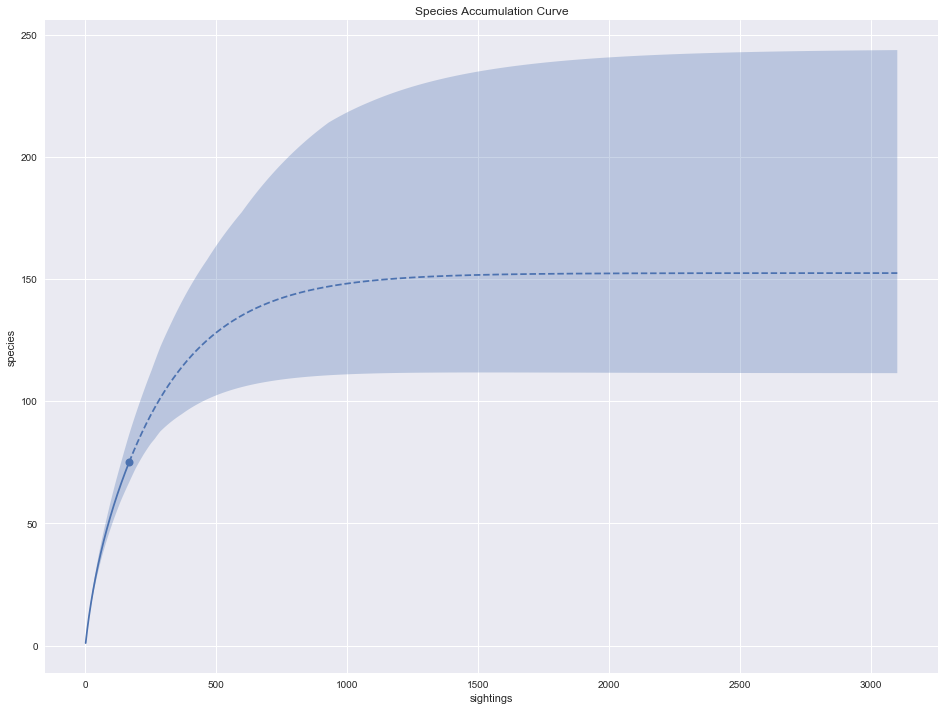

In [10]:
plot.species_accumulation_curve(abundance, incl_minsample=False);

 70%|███████   | 702/1000 [00:00<00:00, 1158.27it/s]/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
100%|██████████| 100/100 [00:22<00:00,  4.40it/s]


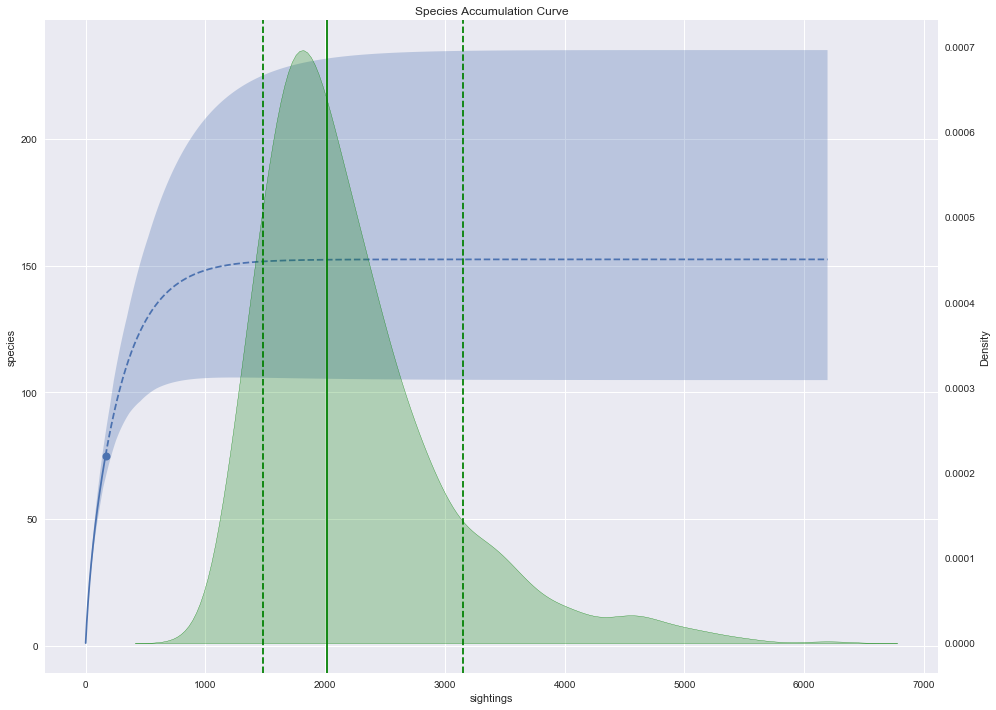

In [11]:
plot.species_accumulation_curve(abundance, incl_minsample=True)

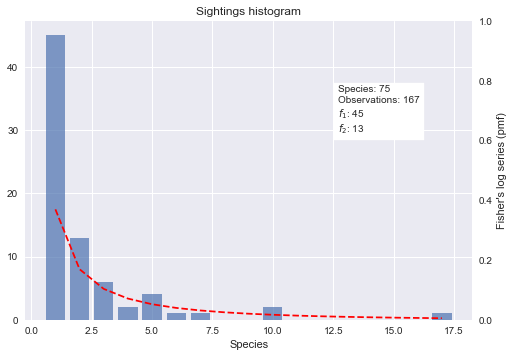

In [12]:
plot.abundance_histogram(abundance);

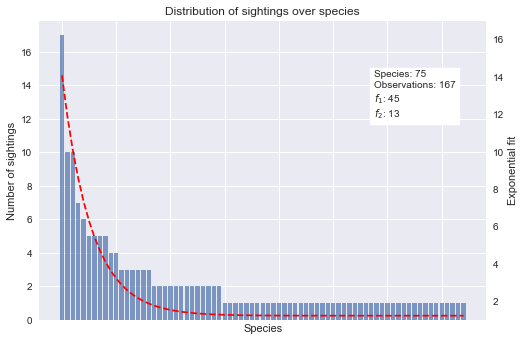

In [13]:
plot.abundance_counts(abundance);

Apply chao1:

In [14]:
from copia.richness import diversity
print('Empirical (species):', diversity(abundance)) # = diversity(abundance, method='empirical')
print('Empirical (sightings):', diversity(abundance, species=False))
print('chao1:', diversity(abundance, method='chao1'))
print('iChao1:', diversity(abundance, method='iChao1'))
print('ACE:', diversity(abundance, method='ACE'))
print('Egghe & Proot:', diversity(abundance, method='egghe_proot'))
print('Jackknife:', diversity(abundance, method='jackknife'))

Empirical (species): 75
Empirical (sightings): 167
chao1: 152.41824044219254
iChao1: 171.54324044219254
ACE: 152.3244760991645
Egghe & Proot: 170.30024512537264
Jackknife: 177.0


In [15]:
print(diversity(abundance, method='jackknife', return_order=True))
print(diversity(abundance, method='jackknife', return_order=True, CI=True))
print(diversity(abundance, method='jackknife', CI=True, conf=.89))
print(diversity(abundance, method='jackknife', return_order=False,
               CI=True, conf=.89))

{'richness': 177.0, 'order': 3}
{'richness': 177.0, 'order': 3, 'lci': 127.80529442066658, 'uci': 226.1947055793334}
{'richness': 177.0, 'lci': 136.88567055436792, 'uci': 217.11432944563208}
{'richness': 177.0, 'lci': 136.88567055436792, 'uci': 217.11432944563208}


In [16]:
print(diversity(abundance, method='minsample'))
print(diversity(abundance, method='minsample', solver='grid'))
print(diversity(abundance, method='minsample', solver='fsolve'))
print(diversity(abundance, method='minsample', solver='grid', tolerance=1e-10))

2214.756047756048
2214.756047756048
2214.754452813089
2214.756047756048


/Users/mikekestemont/GitRepos/copia/copia/richness.py:447: UserWarning: Tolerance criterion not met: 0.005726762492940907 > 1e-10
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")


{'richness': 2214.754452813089, 'x*': 12.262002711455622, 'n': 167}


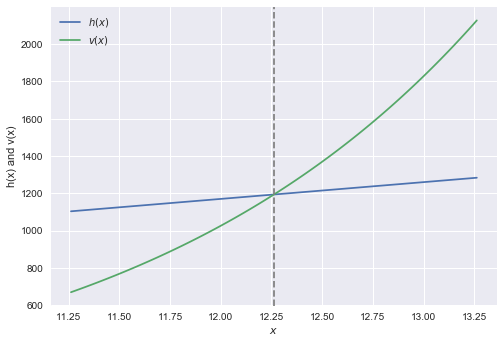

In [17]:
print(diversity(abundance, method='minsample', solver='fsolve', diagnostics=True))

## Compare multiple assemblages

In [18]:
assemblages = {}
for lang in ('dum', 'isl', 'gle', 'eng'):
    works = pd.read_csv(f'datasets/{lang}.csv', sep=';',
                        header=None).iloc[:, 0]
    assemblages[lang] = to_abundance(works)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:125: UserWarning: Add-one smoothing for f4 = 0
  warnings.warn("Add-one smoothing for f4 = 0", UserWarning)
  0%|          | 0/1000 [00:00<?, ?it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:125: UserWarning: Add-one smoothing for f4 = 0
  warnings.warn("Add-one smoothing for f4 = 0", UserWarning)
100%|██████████| 1000/1000 [00:00<00:00, 4762.63it/s]


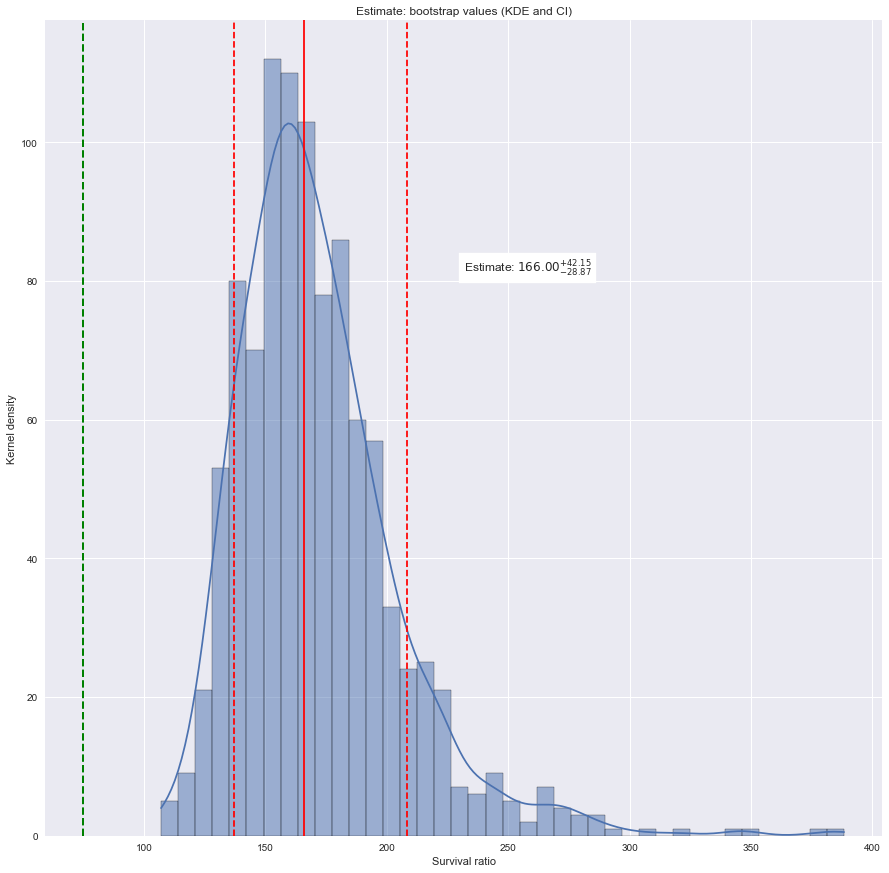

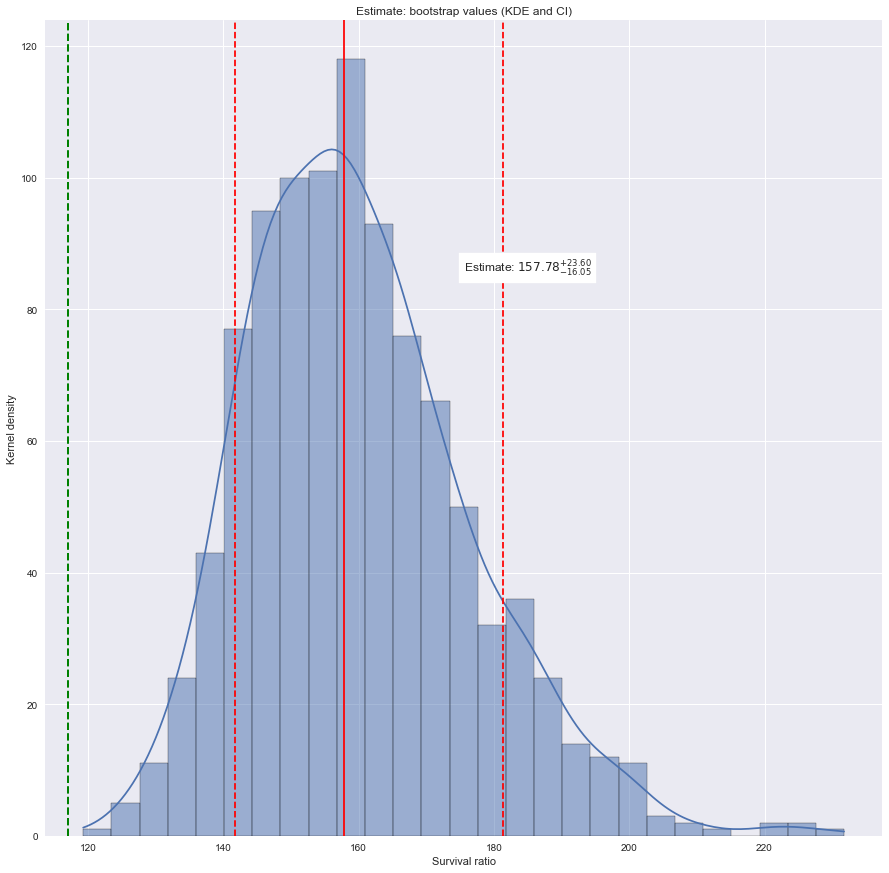

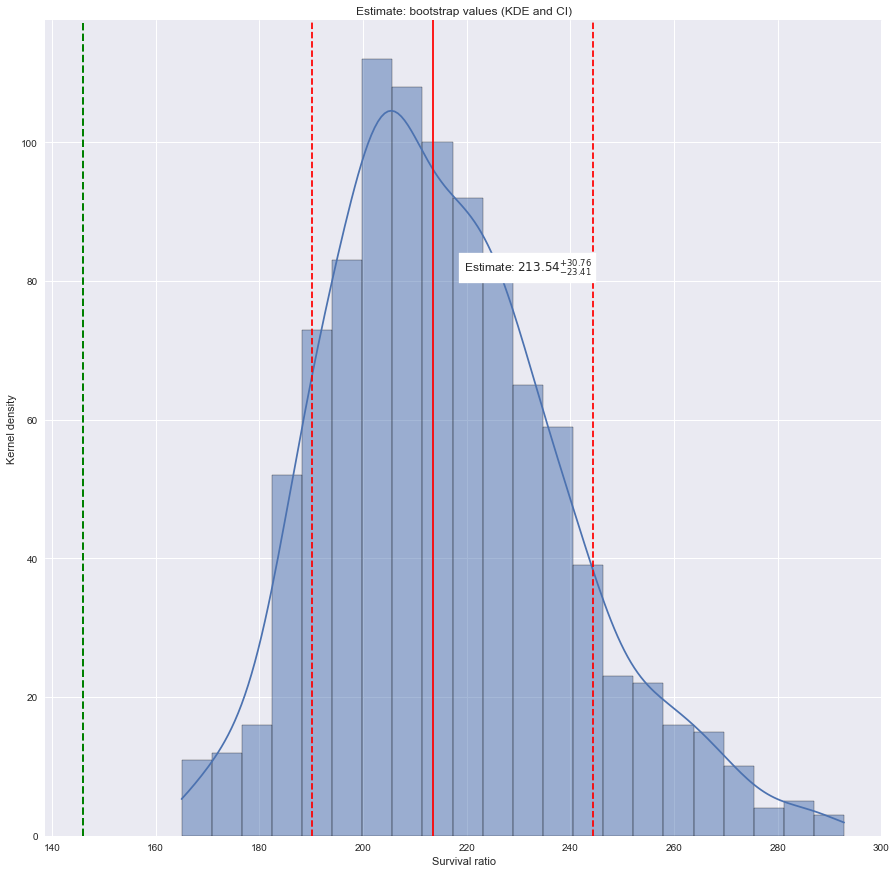

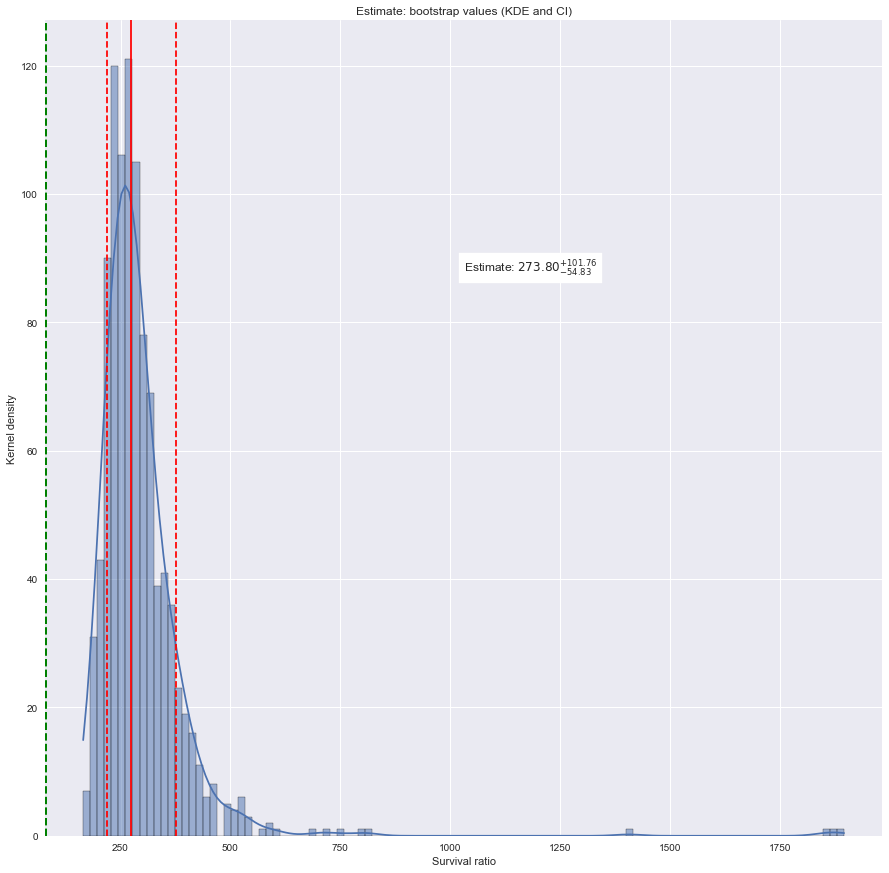

In [19]:
for lang, assemblage in assemblages.items():
    empirical = diversity(assemblage, method='empirical')
    estimate = diversity(assemblage, method='iChao1', CI=True)
    plot.richness_density(estimate, empirical)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:125: UserWarning: Add-one smoothing for f4 = 0
  warnings.warn("Add-one smoothing for f4 = 0", UserWarning)
  0%|          | 0/1000 [00:00<?, ?it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:125: UserWarning: Add-one smoothing for f4 = 0
  warnings.warn("Add-one smoothing for f4 = 0", UserWarning)
100%|██████████| 1000/1000 [00:00<00:00, 4814.61it/s]


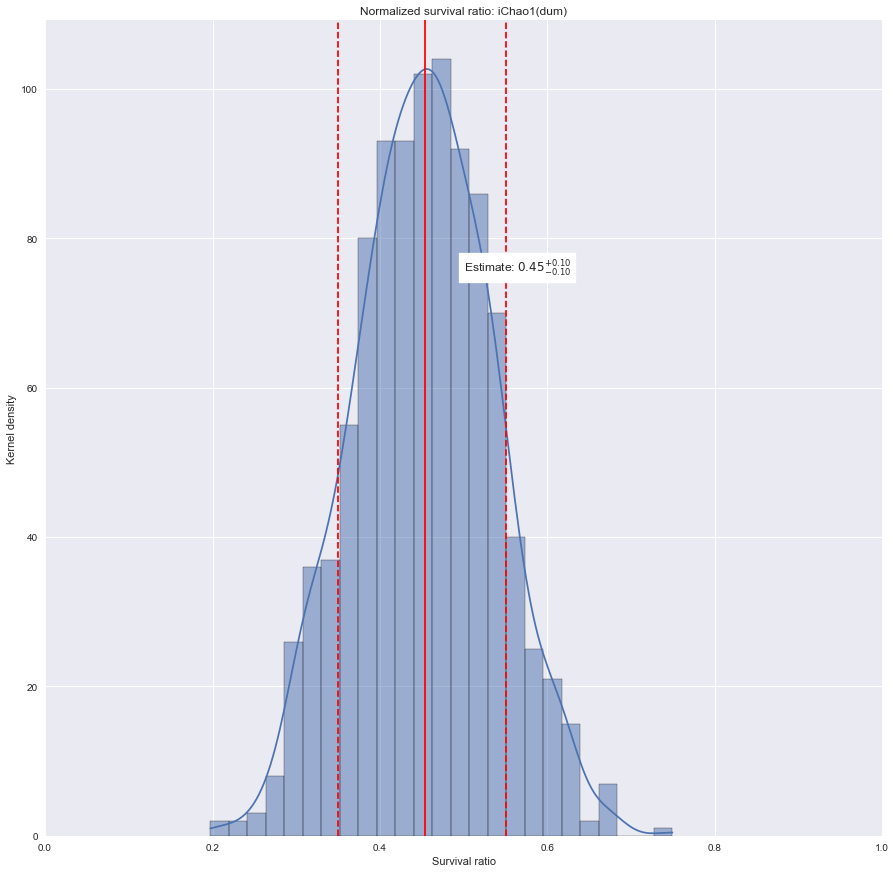

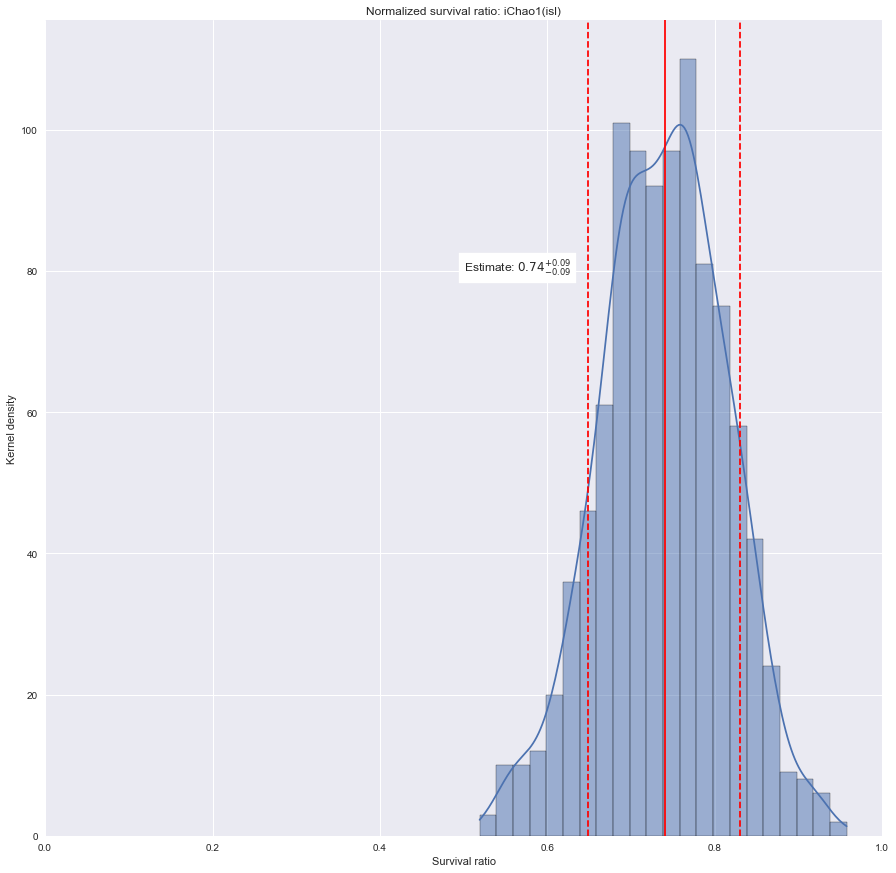

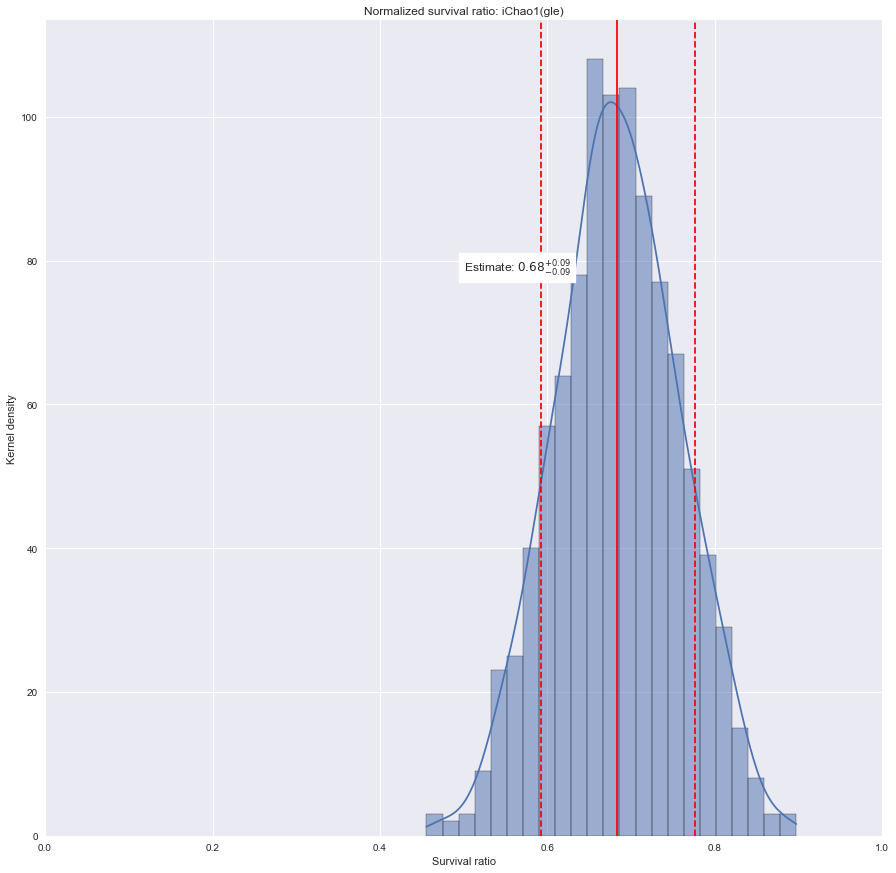

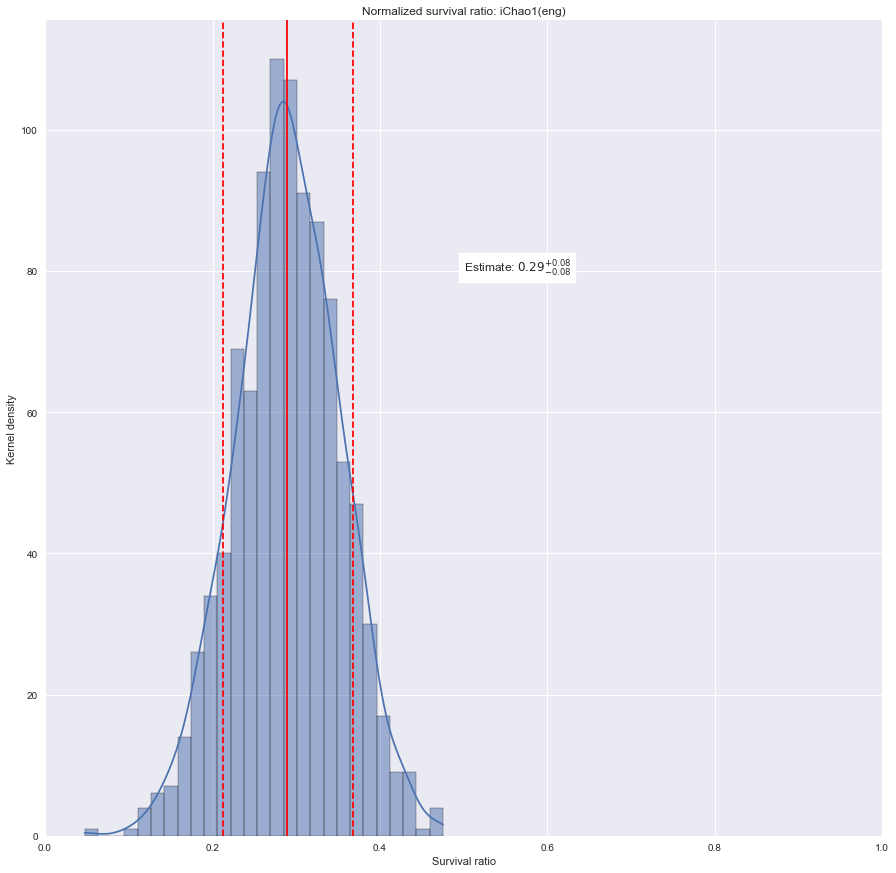

In [20]:
for lang, assemblage in assemblages.items():
    empirical = diversity(assemblage, method='empirical')
    estimate = diversity(assemblage, method='iChao1', CI=True)
    plot.richness_density(estimate, empirical, normalize=True,
                          title=f'Normalized survival ratio: iChao1({lang})')

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:125: UserWarning: Add-one smoothing for f4 = 0
  warnings.warn("Add-one smoothing for f4 = 0", UserWarning)
  0%|          | 0/1000 [00:00<?, ?it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:125: UserWarning: Add-one smoothing for f4 = 0
  warnings.warn("Add-one smoothing for f4 = 0", UserWarning)
100%|██████████| 1000/1000 [00:00<00:00, 4892.99it/s]


,label,survival,lCI,uCI
0,dum,0.437208,0.593503,0.303840
1,isl,0.731366,0.882390,0.596712
2,gle,0.675742,0.829011,0.531382
3,eng,0.273754,0.412833,0.164362


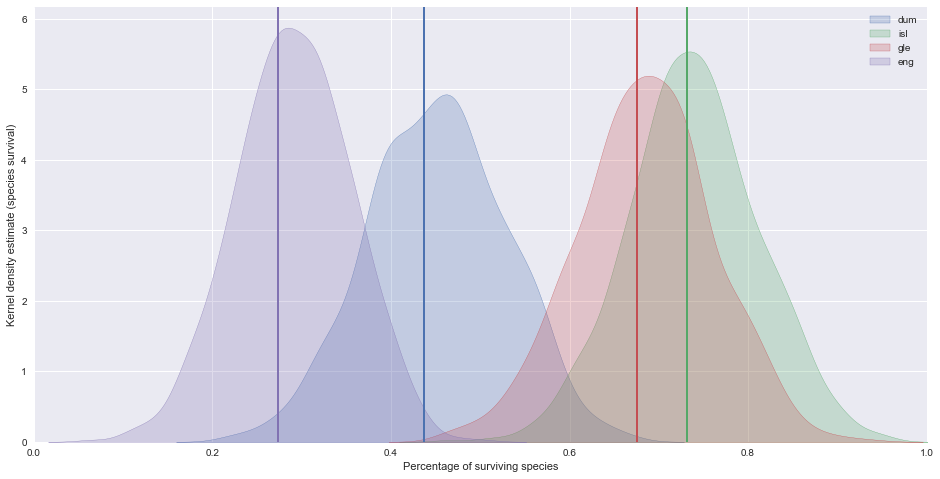

In [21]:
df = plot.survival(assemblages, method='iChao1')
df

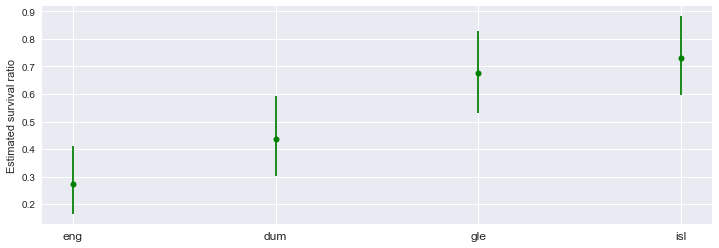

In [22]:
plot.survival_error(df)

 20%|█▉        | 199/1000 [00:03<00:14, 53.72it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:447: UserWarning: Tolerance criterion not met: 121.0 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/mikekestemont/GitRepos/copia/copia/richness.py:450: UserWarning: Optimization failure likely: 0.0 <= 0
  warnings.warn(f"Optimization failure likely: {x_ast} <= 0")
 68%|██████▊   | 685/1000 [00:12<00:05, 58.96it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:447: UserWarning: Tolerance criterion not met: 13.750113779864478 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
100%|██████████| 1000/1000 [00:17<00:00, 56.60it/s]


,label,survival,lCI,uCI
0,dum,0.075403,0.136679,0.040550
1,isl,0.169079,0.283338,0.098942
2,gle,0.144559,0.229440,0.094004
3,eng,0.029293,0.048340,0.016215


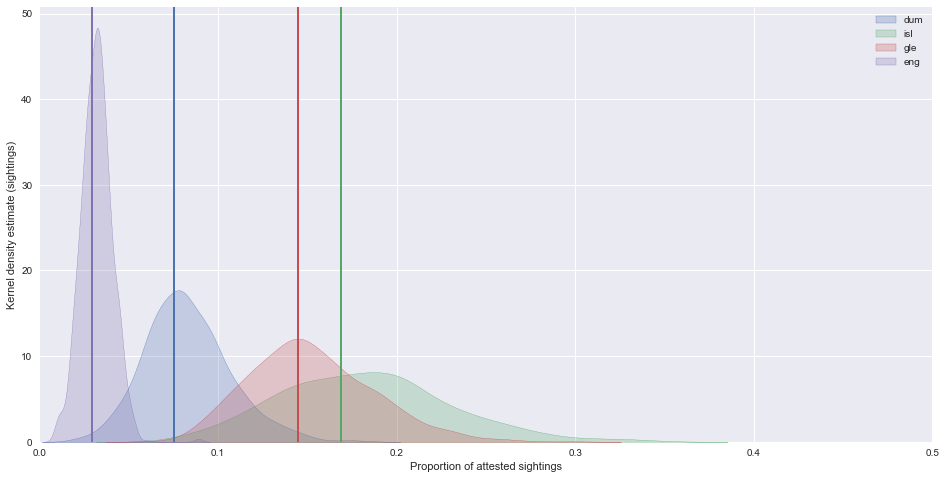

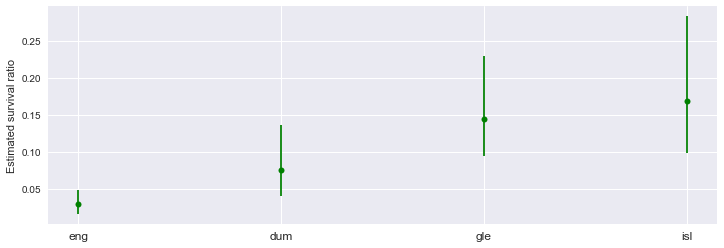

In [23]:
df = plot.survival(assemblages, method='minsample')
plot.survival_error(df)
df

100%|██████████| 1000/1000 [00:19<00:00, 50.35it/s]


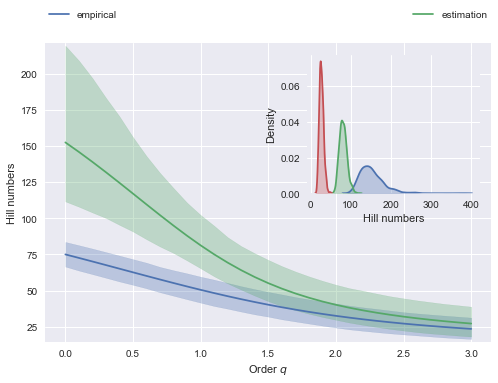

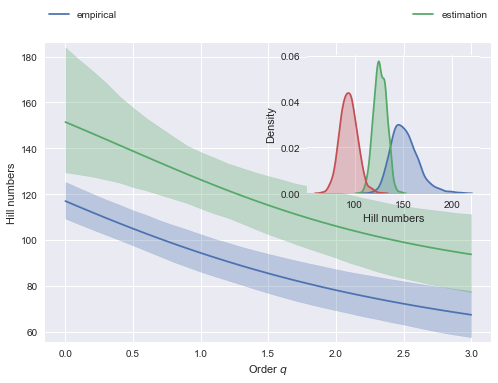

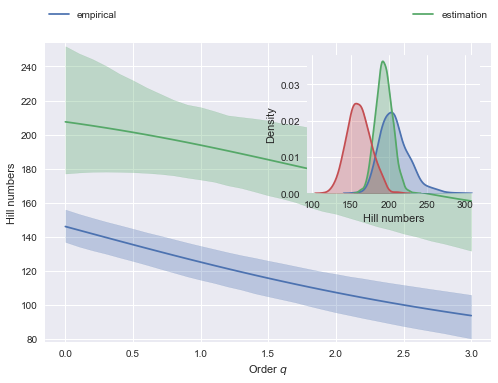

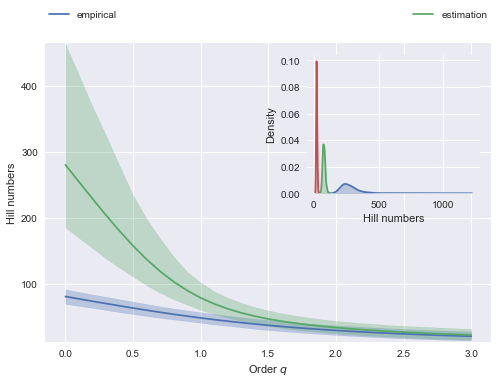

In [24]:
import copia.plot as plot
from copia.hill import hill_numbers

hill_est = {}
for lang, assemblage in assemblages.items():
    emp, est = hill_numbers(assemblage)
    plot.hill_plot(emp, est)
    hill_est[lang] = est

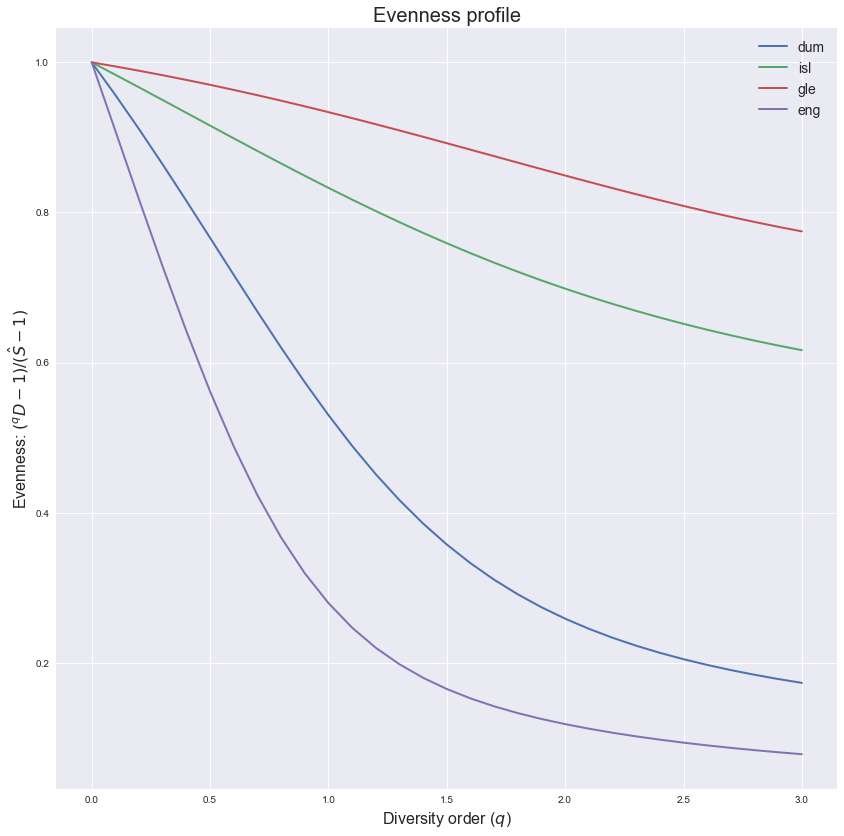

In [25]:
plot.evenness_plot(hill_est)

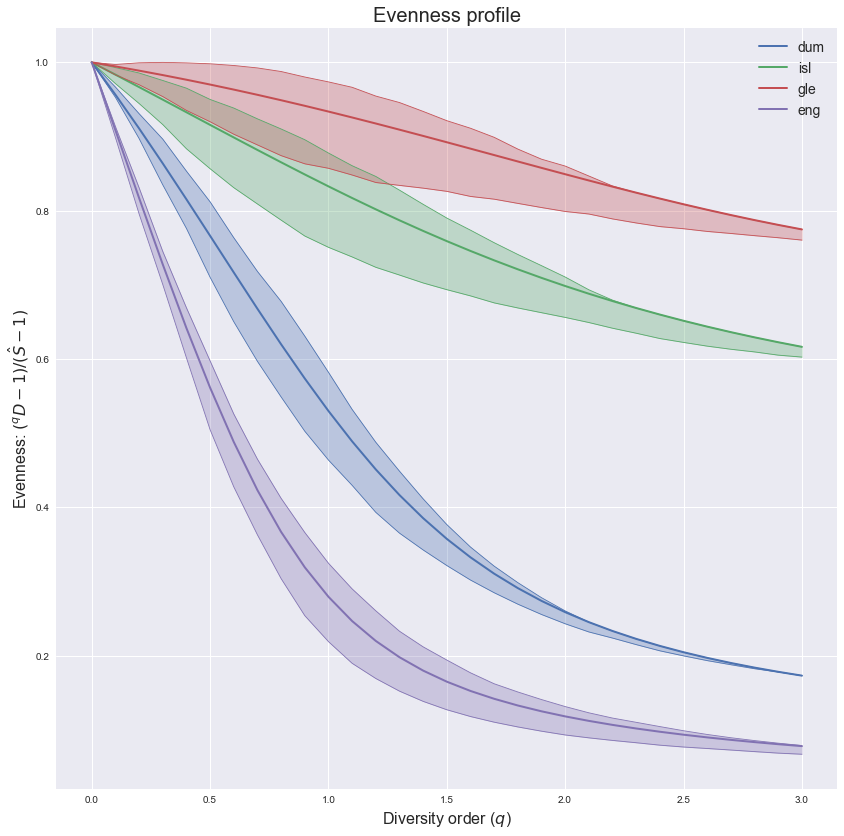

In [26]:
plot.evenness_plot(hill_est, incl_CI=True)